# **Object Detection**

## **1. Nhiệm vụ của bài toán Object Detection**

1. Xác định sự xuất hiện tất cả các đối tượng đang có trong hình và vị trí của chúng
2. Lọc ra đối tượng cần được chú ý

## **2. Những các tiếp cận để giải quyết bài toán Object Detection**

### **Approach 1:** Cách ngây thơ (Chia để trị)
- Là cách đơn giản nhất chúng ta có thể chia bức ảnh thành 4 phần
- Feed mỗi phần vào image classifier để xác định output của phần nào có chứa vật thể hay không

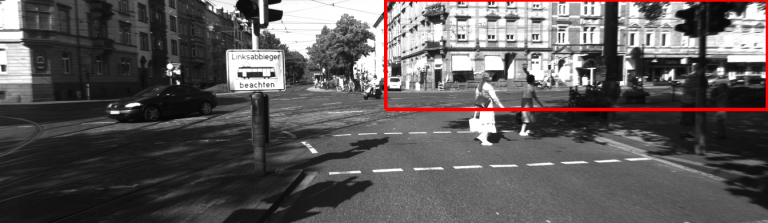

### **Approach 2:** Tăng số lượng patches được chia

- Cần rất nhiểu bounding boxes, nhiều trong số chúng gần tương tự nhau, rất thử thách để training.

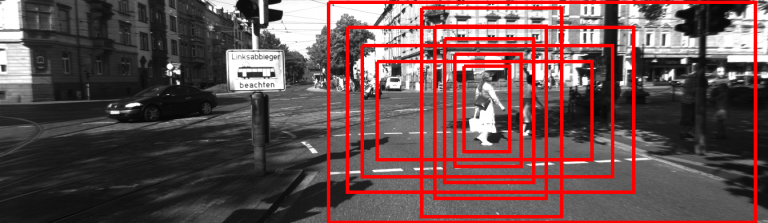

### **Approach 3:** Thực hiện phương pháp chia có cấu trúc

- **Bước 1:** chia bức ảnh thành ô lưới 10x10 

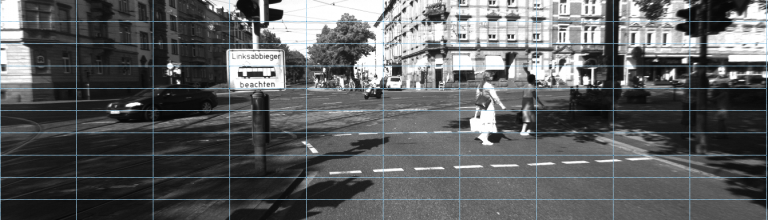

- **Bước 2:** Xác định centroid (tâm) của mỗi ô lưới
- **Bước 3:** Với mỗi centroid, lấy ra 3 ô có chiều cao và tỉ lệ khung hình khác nhau

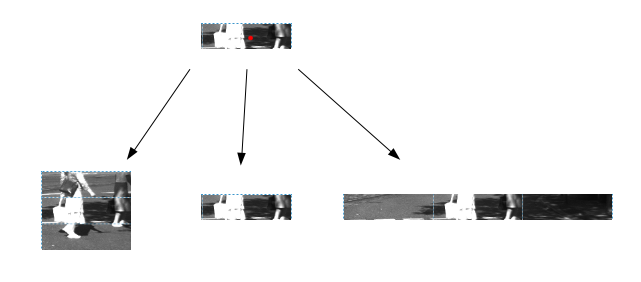

- **Bước 4:** Đưa tất cả các patches vào image classifier để dự đoán

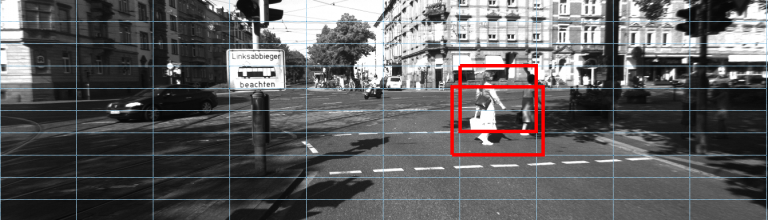

### **Approach 4:** Cải tiến cách tiếp cận 3 

**1. Tăng số lượng ô lưới 20x20:**

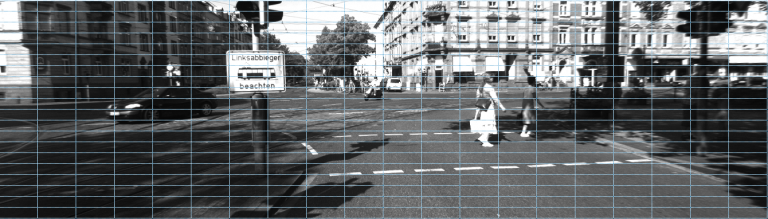

**2. Sử dụng nhiều patches hơn có thể 9 với kích thước khác nhau:**

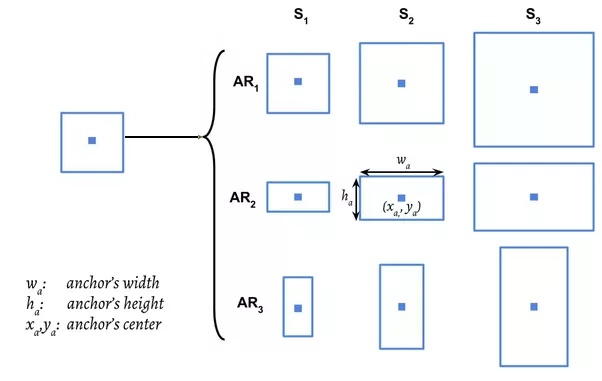

### **Approach 5:** Sử dụng Deep Learning để chọn lựa các features, và là cách tiếp cận hiệu quả nhất 

- Thay vì chọn các patches từ ảnh gốc, đưa ảnh gốc trực tiêp qua DL model để giảm chiều chúng
- Sử dụng neural network để đưa ra các patches được đề xuất.
- Tăng cừng thuật toán DL để nhận được các dự đoán gần với bouding box thực tế nhất có thể. 

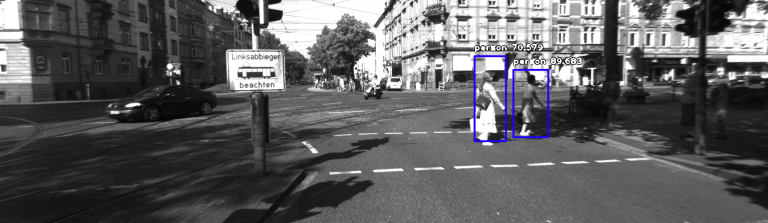

## **3. Các thuật ngữ:**
- **region proposal:** Vùng đề xuất, là những vùng mà có khả năng chứa đối tượng hoặc hình ảnh ở bên trong nó.
- **bounding box:** Là hình chữ nhật được vẽ bao quan đối tượng nhằm xác định đối tượng.
- **offsets:** Là các tham số giúp xác định bounding box bao gồm tâm của bounding box $(x,y)$ và chiều dài, chiều rộng $(w,h)$.
- **anchor box:** Chính là một bounding box cơ sở để xác định bounding box bao quanh vật thể dựa trên các phép dịch tâm và scale kích thước chiều dài, rộng. Mỗi loại anchor box sẽ phù hợp để tìm ra bounding box cho 1 loại vật thể đặc trưng. Chẳng hạn vật thể là con người thường có chiều cao > chiều rộng trong khi đoàn tàu sẽ có chiều rộng lớn hơn nhiều lần chiều cao.
- **pipeline:** Là một tợp hợp các bước xử lý liên tiếp nhận đầu vào là dữ liệu (ảnh, âm thanh, các trường dữ liệu) và trả ra kết quả dự báo ở output.

## **4. Cấu trúc RCNN (Region-based Convolutional Neural Network)**

### **4.1 R-CNN(2014)**

Kiến trúc của R-CNN gồm 3 thành phần đó là:

- Vùng đề xuất hình ảnh (Region proposal): Có tác dụng tạo và trích xuất các vùng đề xuất chứa vật thể được bao bởi các bounding box.

- Trích lọc đặc trưng (Feature Extractor): Trích xuất các đặc trưng giúp nhận diện hình ảnh từ các region proposal thông qua các mạng deep convolutional neural network.

- Phân loại (classifier): Dựa vào input là các features ở phần trước để phân loại hình ảnh chứa trong region proposal về đúng nhãn.

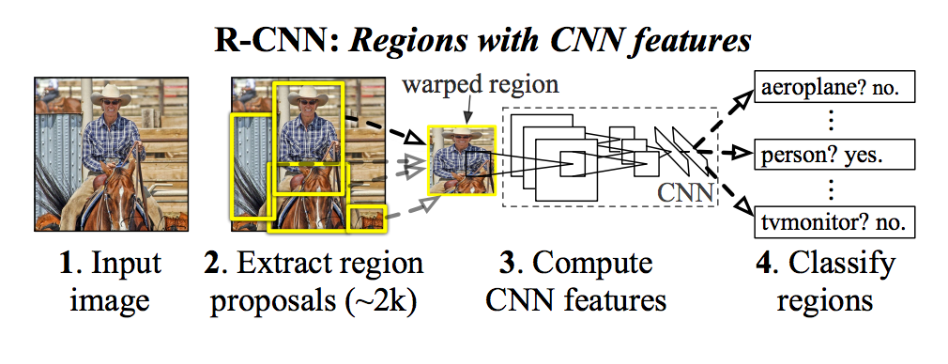

- Kỹ thuật sử dụng để đề xuất các region proposal hoặc các bounding box chứa các đối tượng tiềm năng trong bức ảnh được gọi là `selective search`, có nhiều thuật toán khác nhau để phát hiện các region proposal nhưng điểm chung đều dựa trên tỷ lệ `IoU` giữa bounding box và ground truth box.
- Dùng mạng CNN để trích xuất đặc trưng, ở đây mạng AlexNet, output là vector 4096 chiều mô tả nội dung của bức ảnh, rồi đực đưa đến mô hình SVM tuyến tính để để phân loại.

**Nhược điểm:** Chậm, vượt qua nhiều module độc lập khác nhau, trích xuất khoảng 2000 vùng đề xuất.

### **4.2 Fast R-CNN(2015)**

**Hạn chế của mô hình R-CNN:**
- Training qua một pipeline gồm nhiều bước: Pipeline liên quan đến việc chuẩn bị và vận hành ba mô hình riêng biệt.
- Chi phí training tốn kém về số lượng bounding box và thời gian huấn luyện: Mô hình huấn luyện một mạng CNN học sâu trên rất nhiều region proposal cho mỗi hình ảnh nên rất chậm.
- Phát hiện đối tượng chậm: Tốc độ xử lý không thể đảm bảo realtime.


**Điểm nổi bật của Fast R-CNN là sử dụng một single model pipeline để phát hiện region và classification cùng một lúc**

Kiến trúc của mô hình trích xuất từ bức ảnh một tập hợp các region proposals làm đầu vào được truyền qua mạng deep CNN. Một pretrained-CNN, chẳng hạn VGG-16, được sử dụng để trích lọc features. Phần cuối của deep-CNN là một custom layer được gọi là layer vùng quan tâm (Region of Interest Pooling - RoI Pooling) có tác dụng trích xuất các features cho một vùng ảnh input nhất định.

Sau đó các features được kết bởi một lớp fully connected. Cuối cùng mô hình chia thành hai đầu ra, một đầu ra cho dự đoán nhãn thông qua một softmax layer và một đầu ra khác dự đoán bounding box (kí hiệu là bbox) dựa trên hồi qui tuyến tính. Quá trình này sau đó được lặp lại nhiều lần cho mỗi vùng RoI trong một hình ảnh.

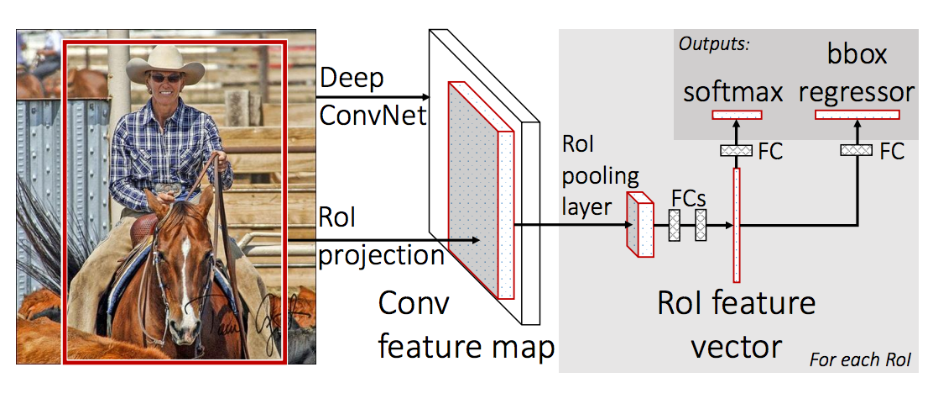

**Hình 3:** Kiến trúc single model Fast R-CNN (được trích xuất từ bài báo gốc). Ở bước đầu ta áp dụng một mạng Deep CNN để trích xuất ra feature map. Thay vì warp image của region proposal như ở R-CNN chúng ta xác dịnh ngay vị trí hình chiếu của của region proposal trên feature map thông qua phép chiếu RoI projection. Vị trí này sẽ tương đối với vị trí trên ảnh gốc. Sau đó tiếp tục truyền output qua các layer RoI pooling layer và các Fully Connected layers để thu được RoI feature véc tơ. Sau đó kết quả đầu ra sẽ được chia làm 2 nhánh. 1 Nhánh giúp xác định phân phối xác suất theo các class của 1 vùng quan tâm RoI thông qua hàm softmax và nhánh còn xác định tọa độ của bounding box thông qua hồi qui các offsets.

### **4.3 Faster R-CNN(2016)**

Kiến trúc được đề xuất để tinh chỉnh các region proposals như là một phần của quá trình huấn luyện, được gọi là mạng đề xuất khu vực (Region Propsal Network), hoặc RPN. Các vùng này sau đó được sử dụng cùng với mô hình Fast R-CNN trong một thiết kế mô hình duy nhât. Những cải tiến vừa làm giảm số lượng region proposal vừa tăng tốc hoạt động trong thời gian thử nghiệm mô hình lên gần với real-time với hiệu suất tốt nhất. Tốc độ 5fps trên một GPU.

Mặc dù là một mô hình đơn lẻ duy nhất, kiến trúc này là kết hợp của hai modules:

- Mạng đề xuất khu vực (Region Proposal Network, viết tắT là RPN). Mạng CNN để đề xuất các vùng và loại đối tượng cần xem xét trong vùng.
- Fast R-CNN: Mạng CNN để trích xuất các features từ các region proposal và trả ra các bounding box và nhãn.

Cả 2 modules hoạt động trên cùng một output của một mạng deep CNN. Mạng RPN hoạt động như một cơ chế attention cho mạng Fast R-CNN thông báo cho mạng thứ 2 về nơi cần xem hoặc chú ý.

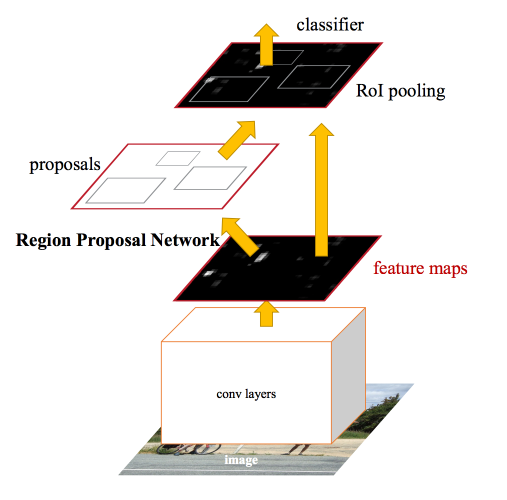

**Hình 4:** Kiến trúc mô hình Faster R-CNN (được trích xuất từ bài báo gốc). Ở giai đoạn sớm sử dụng một mạng deep CNN để tạo ra một feature map. Khác với Fast R-CNN, kiến trúc này không tạo RoI ngay trên feature map mà sử dụng feature map làm đầu vào để xác định các region proposal thông qua một RPN network. Đồng thời feature maps cũng là đầu vào cho classifier nhằm phân loại các vật thể của region proposal xác định được từ RPN network.

RPN hoạt động bằng cách lấy đầu ra của một mạng pretrained deep CNN, chẳng hạn như VGG-16, và truyền feature map vào một mạng nhỏ và đưa ra nhiều region proposals và nhãn dự đoán cho chúng. Region proposals là các bounding boxes, dựa trên các anchor boxes hoặc hình dạng được xác định trước được thiết kế để tăng tốc và cải thiện khả năng đề xuất vùng. Dự đoán của nhãn được thể hiện dưới dạng nhị phân cho biết region proposal có xuất hiện vật thể hoặc không.

Một quy trình huấn luyện xen kẽ được sử dụng trong đó cả hai mạng con được đào tạo cùng một lúc. Điều này cho phép các tham số trong feature dectector của deep CNN được tinh chỉnh cho cả hai tác vụ cùng một lúc.

## **5. Lớp các mô hình họ YOLO**


### **5.1 YOLO(2015)**

Phương pháp chính dựa trên một mạng neural network duy nhất được huấn luyện dạng end-to-end model. Mô hình lấy input là một bức ảnh và dự đoán các bounding box và nhãn lớp cho mỗi bounding box. Do không sử dụng region proposal nên kỹ thuật này có độ chính xác thấp hơn (ví dụ: nhiều lỗi định vị vật thể - localization error hơn), mặc dù hoạt động ở tốc độ 45 fps (khung hình / giây) và tối đa 155 fps cho phiên bản tối ưu hóa tốc độ.

Hoạt động mô hình:
- Trước tiên phân chia hình ảnh đầu vào thành một lưới các ô (grids of cells)
- Mỗi grid cell dự đoán các bounding boxes được xác định dựa trên tọa độ x,y (thông thường là tọa độ tâm, một số phiên bản là tọa độ góc trên cùng bên trái) và chiều rộng (width) và chiều cao (height) và độ tin cậy (confidence) về khả năng chứa vật thể bên trong. Ngoài ra các dự đoán nhãn cũng được thực hiện trên mỗi một bonding box.

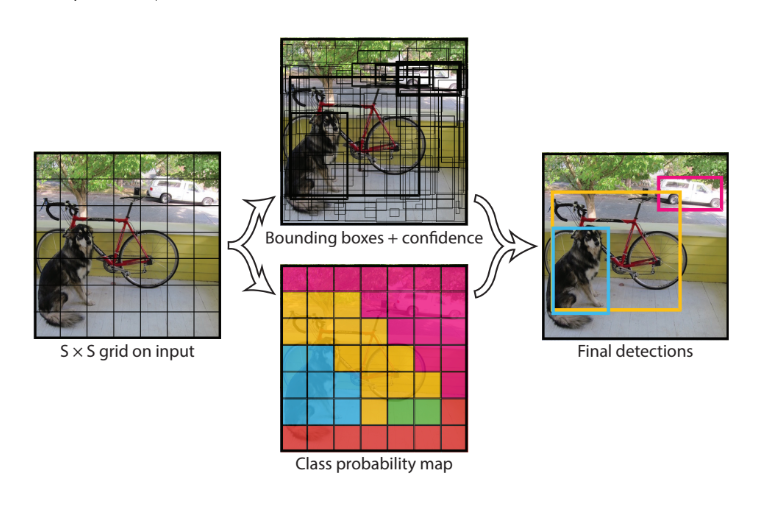

**Hình 5:** Các bước xử lý trong mô hình YOLO (hình ảnh trích xuất từ bài báo gốc). Đầu tiên mô hình chia hình ảnh thành một grid search kích thước $S × S$. Trên mỗi một grid cell ta dự báo một số lượng B bounding boxes và confidence cho những boxes này và phân phối xác suất của $C$ classes. Như vậy output các dự báo là một tensor kích thước $S × S × (B × 5 + C)$. Giá trị 5 là các tham số của offsets của bounding box gồm $x,y,w,h$ và confidence. $C$ là số lượng tham số của phân phối xác suất.



### **5.2 YOLOv2(2016) và YOLOv3(2018)**

Một số thay đổi kiên trúc được thực hiện, như sử dụng batch normalization cho hàng loạt và hình ảnh đầu vào phân giải cao.

Giống như Faster R-CNN, mô hình YOLOv2 sử dụng anchor boxes, bounding box được xác định trước với hình dạng và kích thước hợp lý được tùy chỉnh trong quá trình huấn luyện. Sự lựa chọn các bounding boxes cho hình ảnh được xử lý trước bằng cách sử dụng thuật toán phân cụm k-mean trên tập dữ liệu huấn luyện.

Quan trọng, các predicted bounding được tinh chỉnh để cho phép các thay đổi nhỏ có tác động ít hơn đến các dự đoán, dẫn đến mô hình ổn định hơn. Thay vì dự đoán trực tiếp vị trí và kích thước, các offsets (tức tọa độ tâm, chiều dài và chiều rộng) được dự đoán để di chuyển và định hình lại các pre-defined anchor boxes tại mỗi một grid cell thông qua hàm logistic.

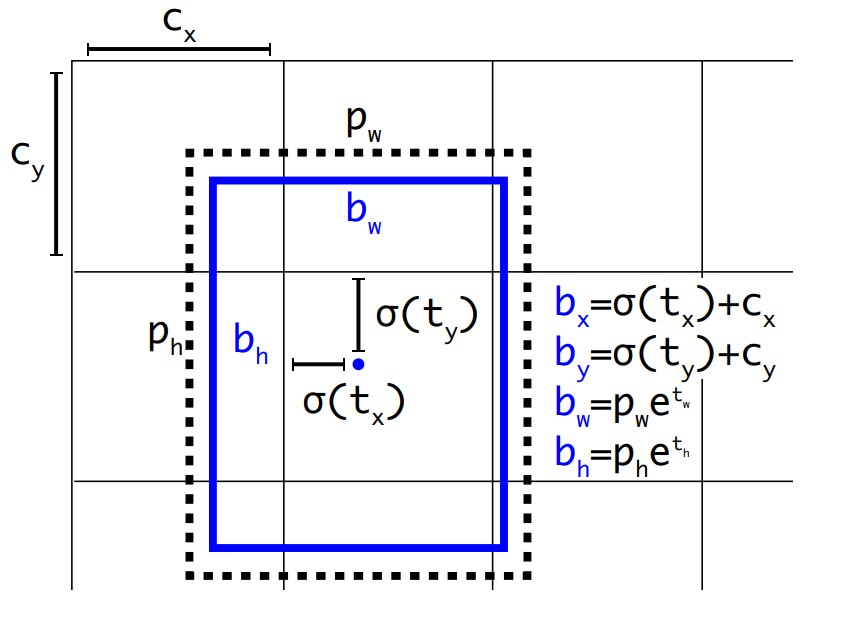

## **References:**
1. [A Step-by-Step Introduction to the Basic Object Detection Algorithms (Part 1)](https://www.analyticsvidhya.com/blog/2018/10/a-step-by-step-introduction-to-the-basic-object-detection-algorithms-part-1/?utm_source=blog&utm_medium=computer-vision-learning-path-2020)
2. [Understanding and Building an Object Detection Model from Scratch in Python](https://www.analyticsvidhya.com/blog/2018/06/understanding-building-object-detection-model-python/)